In [290]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Problem 1a)

SpotifyFeatures.csv file and report the number of samples (songs) as well as the number of features (song properties) in the dataset. I will solve this by using the hint using panda ans the read_csv function

In [291]:
#Loading data 
path = "SpotifyFeatures.csv/SpotifyFeatures.csv" 
data = pd.read_csv(path) #Spotify data 

# Print the number of samples and features
samples = data.shape[0] # number of songs
features = data.shape[1] #Song properties
print(f'Number of samples: {samples}')
print(f'Number of features: {features}')


Number of samples: 232725
Number of features: 18


### Problem 1b)

Retriving all samples belonging to the two genres and create labels for the samples i.e: ’Pop’ = 1, ’Classical’ = 0. 
Then Report how many samples belongs to the two classes. Working with all features is not always the best solution since it increases the computational cost and some of them may be useless for the task. For this dataset you
should be able to separate the two classes by using two features, namely ’liveness’ and ’loudness’.


In [292]:

# Picking up only 'Pop' and 'Classical' genres from the data
pop_classic_data = data[data['genre'].isin(['Pop', 'Classical'])].copy()
                      
# Sorting the songs(samples) into two genres (pop and classical) by using labels.
#Making classicals songs having the value 0, and pop belonging to value 1 from the spotify data
pop_classic_data['label'] = pop_classic_data['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

#Reporting how many samples belongs to the two genres:
#taking the len to count number of value 1 and 0 
print("Amunt of classical songs:",len(pop_classic_data[pop_classic_data['label']==0]))
print("Amunt of pop songs:",len(pop_classic_data[pop_classic_data['label']==1]))

#Dividing the classes into two features. (From lecture: Features = columns while samples(songs)= rows)
selected_features = pop_classic_data[['liveness', 'loudness','label']] #The label is telling us if its or 1
print(selected_features)

Amunt of classical songs: 9256
Amunt of pop songs: 9386
        liveness  loudness  label
104022    0.0762   -21.356      0
104023    0.1060   -34.255      0
104024    0.0916   -28.215      0
104025    0.1730   -37.264      0
104026    0.0858   -35.213      0
...          ...       ...    ...
167297    0.0776   -25.477      0
167298    0.2450   -28.192      0
167299    0.0816   -25.843      0
167300    0.1050   -20.238      0
167301    0.0953   -29.223      0

[18642 rows x 3 columns]


### Problem 1c)
Create two numpy arrays from the reduced dataset: one matrix with songs as rows and features ("liveness" and "loudness") as columns (input for machine learning), and one vector with song genres (labels/target). Split the dataset into training (80%) and test (20%) sets, maintaining class distribution in both.

In [293]:
#X Matrix with songs as rows, lables as features 
X = pop_classic_data[['liveness', 'loudness']].values  # feature matrix

# y, contains vector with songs
y = pop_classic_data['label'].values  # Target array (labels)

#Training set with 80%training set 20%test set split + the data is shuffeled by using random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#For later
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)



### Problem 1d)

Plot the samples on the liveness vs loudness plane, with a different color for each class. From the
plot, will the classification be an easy task? why

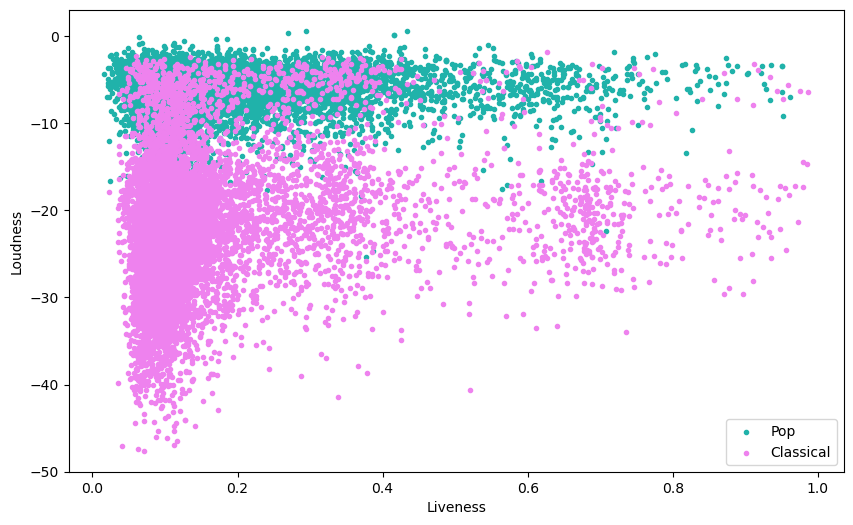

In [294]:
plt.figure(figsize=(10, 6))

# Liveness is the first column (index 0) and loudness is the second column (index 1)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="lightseagreen", label="Pop", marker=".")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="violet", label="Classical", marker=".")

plt.xlabel("Liveness")
plt.ylabel("Loudness")
plt.legend()
plt.show()




From the figure it will be some challange deviding the classes as the pop and classical data is overlapping.

### Problem 2a)
Implement a logistic regression classifier using stochastic gradient descent in Python. Train the classifier with the training data and plot the training error vs. epochs. Report the accuracy on the training set. Experiment with different learning rates and explain the results. Optionally, shuffle the data to improve learning.

Logistic Regression is based on the Sigmoid function:
$$
y = \frac{1}{1 + e^{-x}} \quad \text{or} \quad y = \frac{1}{1 + e^{-wx + b}}
$$

To perform Logistic Regression, we start with zero weights and bias, and then use Gradient Descent to find the optimal weights and bias.
In gradient descent, the following update rules are used to minimize the cost function:

w = w - α * dw

b = b - α * db

Where α is the learning rate, and the gradients dw (for weights) and db (for bias) are defined as:

dw = X.T * (y_pred - y)
db = sum(y_pred - y)


In [295]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def LogisticRegression(X, y, weights, bias, learning_rate=0.001, n_iters=200):
    m_samples, n_features = X.shape  # dimensions of the X matrix
    
    # use a for-loop for the Gradient descent:
    for i in range(n_iters):
        linear_prediction = np.dot(X, weights) + bias  # X*w + b
        predictions = sigmoid(linear_prediction)           

        # calculate the gradients
        dw =  np.dot(X.T, (predictions - y)) #tranpose X to for matrix multiplication
        db =  np.sum(predictions - y)

        # upadte the weights and bias
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db


    # now we got the most optimal weights and bias, so this is the best prediction (for this epoch)
    linear_prediction = np.dot(X, weights) + bias
    y_prediction = sigmoid(linear_prediction)

    #Classefying
    class_pred = [0 if y<=0.5 else 1 for y in y_prediction]

    return class_pred, weights, bias

In [296]:
def entropy(Y, Y_hat):
    E = 0
    e = 0.000001    #Avoiding getting log(0)
    for i in range(len(Y)):
        E += (Y[i] * np.log(Y_hat[i] + e) + (1-Y[i]) * np.log(1-Y_hat[i] + e))
    return -E

Here’s the translation:

An epoch goes through the training set once with the same parameters. The x-axis represents epochs, and the y-axis represents error.

The error formula is:  
$$E = \sum(y \cdot \log(y\_hat) + (1 - y) \cdot \log(1 - y\_hat))$$

Plotting the training error vs. epochs:

C:\Users\katri\AppData\Local\Temp\ipykernel_10188\3611989929.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


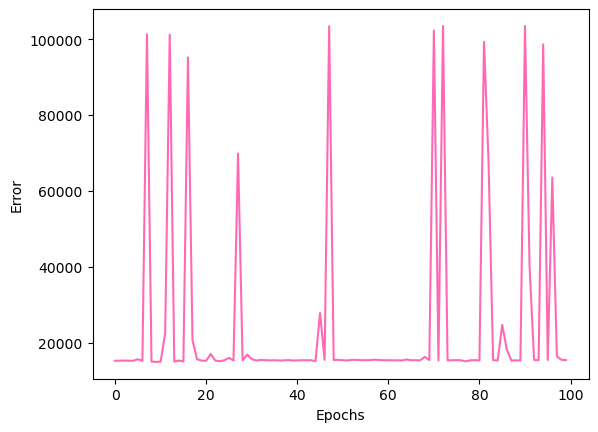

In [297]:
def epochs(learning_rate=0.001):
    weights = np.zeros(X_train.shape[1]) #Initialize weights to zero, same size as the number of features in X_train       
    epochs = np.arange(0,100) #Define the number of epochs
    bias = 0                                         
    loss = []

    for e in epochs:
        #y_prediction predicts values for current epoch, and we update weights and bias for each for loop
        y_prediction, weights, bias = LogisticRegression(X_train, y_train, weights, bias, learning_rate=learning_rate)
        loss.append(entropy(y_train, y_prediction)) # the cross-entropy loss

    return epochs, loss, y_prediction, weights, bias
E = epochs()

plt.plot(E[0],E[1], color="hotpink")        
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

C:\Users\katri\AppData\Local\Temp\ipykernel_10188\3611989929.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


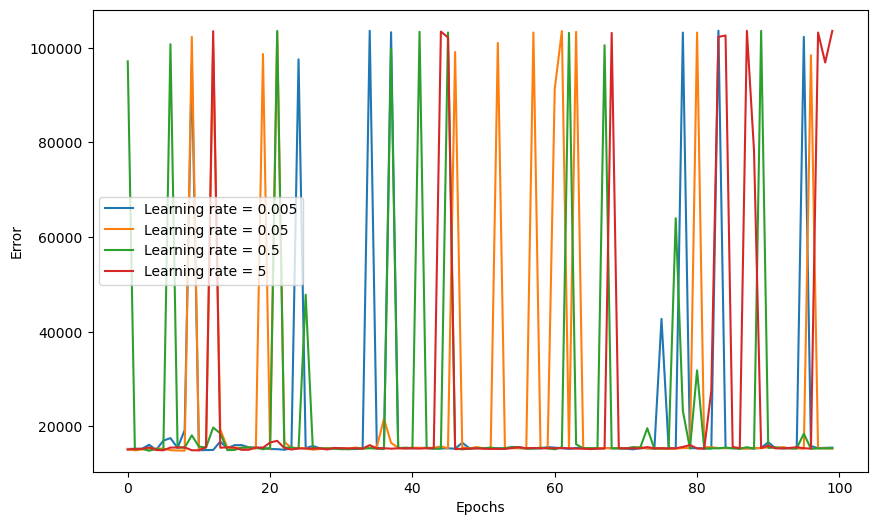

In [298]:
learning_rates_list = [0.005, 0.05, 0.5, 5]  # List of learning rates
weight_list = []  # Store weights for each learning rate
bias_list = []    # Store biases for each learning rate


plt.figure(figsize=(10,6))  # Set plot size
# Loop through each learning rate
for n in learning_rates_list:
    e = epochs(learning_rate=n)
    
    # Save weights and biases
    weight_list.append(e[3])
    bias_list.append(e[4])
    
    # Plot epochs vs. error for each learning rate
    plt.plot(e[0], e[1], label=f"Learning rate = {n}")


plt.xlabel("Epochs")  
plt.ylabel("Error")
plt.legend()
plt.show() 


In [299]:
#The rediction function:
def predict(X, weights, bias):

    linear_pred = np.dot(X, weights) + bias  # X*w + b
    y_pred = sigmoid(linear_pred)                         
    class_pred = [0 if y <= 0.5 else 1 for y in y_pred]    
    return np.array(class_pred)


# Train accurancy in mulitple learning rates
accurancy_list = []
for i in range(len(weight_list)):
    y_test_pred = predict(X=X_train, weights=weight_list[i], bias=bias_list[i])
    acuurancy_matrix = y_test_pred == y_train  #True/False matrix
    test_accuracy = np.mean(acuurancy_matrix) * 100     #Mean of the matrix= accurancy 
    accurancy_list.append(test_accuracy)
    print(f"Learning rate {learning_rates_list[i]} gives train accuracy {test_accuracy:.2f}%")

Learning rate 0.005 gives train accuracy 92.46%
Learning rate 0.05 gives train accuracy 92.56%
Learning rate 0.5 gives train accuracy 92.52%
Learning rate 5 gives train accuracy 49.74%


C:\Users\katri\AppData\Local\Temp\ipykernel_10188\3611989929.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


In [300]:
epochs, loss, y_pred, weights, bias = epochs(learning_rate=learning_rates_list[0])

C:\Users\katri\AppData\Local\Temp\ipykernel_10188\3611989929.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


### Problem 2b)


In [301]:
y_test_pred = predict(X=X_test, weights=weights, bias=bias)

# calculate test accuracy
acuurancy_matrix = y_test_pred == y_test            # get a True/False matrix
test_accuracy = np.mean(acuurancy_matrix) * 100     # take the mean of the matrix to find accurancy 
print(f"Test accurancy is {test_accuracy:.2f}%, with learning rate {learning_rates_list[0]}")

Test accurancy is 92.20%, with learning rate 0.005


C:\Users\katri\AppData\Local\Temp\ipykernel_10188\3611989929.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


### Problem 2c)
Linear
line separating the data on the plot you made in question (1d

### Problem 3a)

In [302]:

CM = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(CM)

Confusion Matrix:
[[1656  195]
 [  96 1782]]


In [303]:

cm_accuracy =(CM[0,0] + CM[1,1]) / (CM[0,0] + CM[0,1] + CM[1,0] + CM[1,1]) * 100
print(f"The Test Accuracy is: {cm_accuracy:.2f}%")

The Test Accuracy is: 92.20%


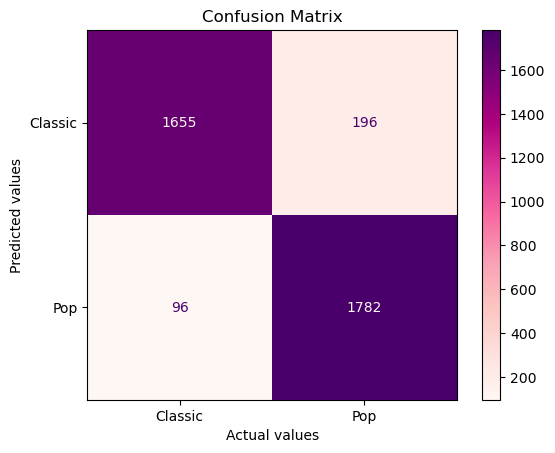

In [304]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classic', 'Pop'])
disp.plot(cmap=plt.cm.RdPu)

plt.title("Confusion Matrix")
plt.ylabel("Predicted values")
plt.xlabel("Actual values")
plt.show()


### Problem 3c)

In [305]:
#Misclasified songs
MS_incident = [i for i in range(len(y_test)) if y_test[i] != y_test_pred[i]]
#Miss classified details. 
MS_details = data.iloc[MS_incident] #Combine original dataframe to get all the features removed

Recommended_songs = MS_details[(y_test[MS_incident] == 0) & (y_test_pred[MS_incident] == 1)]
Recommended_songs= Recommended_songs[0:3]  #Recommend 3 songs

print("Classic songs for Pop fan:")
print(Recommended_songs[['track_name', 'artist_name', 'liveness', 'loudness']])

Classic songs for Pop fan:
                  track_name     artist_name  liveness  loudness
24   Quand je monte chez toi  Henri Salvador     0.143    -7.287
34  Ambarsare Diyan Warhiyan          Chorus     0.222   -10.732
44         Dancing with Gene        Ken Page     0.158    -8.904
